In [1]:
import metaknowledge as mk
import pandas as pd
import numpy as np
from random import randint
import datetime

#For plotting in Python
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#For Tables:
from IPython.display import display
pd.set_option('display.max_columns', 500)

#For plotting in R (ggplot2)
#%load_ext rpy2.ipython

In [2]:
import pickle as pk
import pandas as pd

f = open("COVID-19/textdata.pkl","rb")
doc_clean = pk.load(f)
text_data = [doc.split(' ') for doc in doc_clean]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vec = CountVectorizer()
Xrc = vec.fit_transform(doc_clean)

display(pd.DataFrame(Xrc.toarray(), columns=vec.get_feature_names()).transpose()) 
#To look into the vectors. Beware, can take a bit of RAM

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
aalto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abbreviation,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abdomen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
abdominal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhuang,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zidovudine,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=80, n_iter=7, random_state=42)

XSVD = SVD.fit_transform(Xrc)
print(SVD.explained_variance_ratio_.sum())
dSVD = pd.DataFrame(XSVD)

sSVD = dSVD[[0,1]]
sSVD.columns = ['x','y']
embedding = sSVD

0.7668895244597685


In [5]:
%%R -i sSVD --width 1200 --height 800 -r 140 --bg #F8F4E9
library(hrbrthemes)
library(ggplot2)

library(showtext)
font.add.google(name = "Alegreya Sans SC", family = "SC")
showtext.auto()


p <- ggplot(sSVD, aes(x=sSVD$x, y=sSVD$y)) + geom_point(color="#dd593c", alpha=0.4,pch=16,cex=0.9)+
labs(x="", y="",
       title="The first two components...",
       subtitle="...as determined by SciKit learn's truncated SVD-implementation.",
       caption="by Maximilian Noichl")+
theme_ipsum()+
theme(panel.grid.major = element_line(colour = "lightgrey"),panel.grid.minor = element_blank()) +

theme(plot.title = element_text(size=27, family="SC", face="plain"))


p

UsageError: Cell magic `%%R` not found.


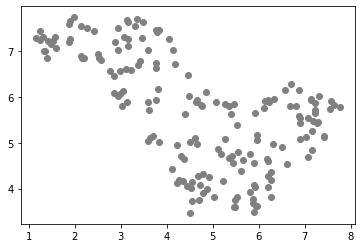

In [6]:
import umap
embedding = umap.UMAP(n_neighbors=15,#small => local, large => global: 5-50
                      min_dist=0.001, #small => local, large => global: 0.001-0.5
                      metric='cosine').fit_transform(XSVD)
embedding = pd.DataFrame(embedding)
embedding.columns = ['x','y']
plt.scatter(embedding['x'], embedding['y'], color='grey')

In [7]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, gen_min_span_tree=True)
clusterer.fit(embedding)
XCLUST = clusterer.labels_
clusternum = len(set( clusterer.labels_))-1

dfclust = pd.DataFrame(XCLUST)
dfclust.columns = ['cluster']

print(clusternum)

15


In [8]:
df = pd.DataFrame(doc_clean)
df.columns = ['text']
df = pd.concat([df, dfclust],axis=1)

fullstrsl = []
#display(df)
for x in range(0,clusternum):
    abstracts = list(df.loc[df['cluster'] == x]['text'])
    abstracts = ";".join(str(x) for x in abstracts).replace(',',';')
    #print(abstracts)
    fullstrsl.append(abstracts)
#print(fullstrsl)
vec = CountVectorizer(token_pattern=r'(?<=[^|;])[\s\w]+(?=[$|;])')

X = vec.fit_transform(fullstrsl)

#display(pd.DataFrame(X.toarray(), columns=vec.get_feature_names()).transpose()) #To look into the vectors. Beware, can take a bit of RAM


clusterfeatures = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
fullscore = []
for x in range(0,clusternum):
    scores = zip(vec.get_feature_names(), np.asarray(X[x,:].sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    myscores = sorted_scores[0:20]
    
    scorelist = []
    for s in myscores:
        scorelist.append(s[0])
    fullscore.append(scorelist)
display(pd.DataFrame(fullscore))

head = []
for l in fullscore:
    head.append(str(l[:6]).replace("'","").replace("[","").replace("]","").replace(",","\n"))


#print(head)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,asis sequence comparative observation disease ...,equence disease johnston immune change positiv...,inflammatory specificity value house multiple ...,step capsid hypothesis standard result diarrhe...,step cytoplasm goldsmith point pathway brainst...,alue property outbreak basis sequence environm...,asis first emergency seventy disease january d...,asis sequence disease change claim mouse conta...,asis sequence disease protease immune january ...,asis sequence disease protease immune positive...,asis sequence emergency disease aspect january...,asis sequence emergency implement disease mech...,attern update epidemic surveillance disease tr...,axis production stability,axis stability validity macro,ccounting first sequence disease dispute janua...,december pneumonia phosphate option personal w...,eadiness first disease still january clear cor...,ector spectrum first sequence protection bindi...,eference level epidemic transformation collect...
1,asis sequence disease protease immune positive...,axis production stability,elationship sequence disease immune change pha...,elationship sequence observation killer diseas...,equence graham disease special immune change p...,five accord exhibit membrane fragment inhibito...,four seven comparison activity integral target...,inflammatory candidate multiple value nurse fi...,inflammatory multiple search house sacrifice v...,step precipitate ready chloroform color goldsm...,thirds blockade,thirds progression piglet,thirds representative,alue property outbreak basis sequence environm...,asis first emergency seventy disease january d...,asis sequence comparative observation disease ...,asis sequence disease change claim mouse conta...,asis sequence disease protease immune january ...,asis sequence emergency disease aspect january...,asis sequence emergency implement disease mech...
2,elationship condition first sequence consensus...,ileup first sequence thailand consensus cough ...,inflammatory multiple search ornamental manner...,irst sequence comparative hybridization cowpox...,ondition first sequence technical binding feas...,alue property outbreak basis sequence environm...,asis first emergency seventy disease january d...,asis sequence comparative observation disease ...,asis sequence disease change claim mouse conta...,asis sequence disease protease immune january ...,asis sequence disease protease immune positive...,asis sequence emergency disease aspect january...,asis sequence emergency implement disease mech...,attern update epidemic surveillance disease tr...,axis production stability,axis stability validity macro,ccounting first sequence disease dispute janua...,december pneumonia phosphate option personal w...,eadiness first disease still january clear cor...,ector spectrum first sequence protection bindi...
3,asis first emergency seventy disease january d...,asis sequence emergency disease aspect january...,asis sequence emergency implement disease mech...,attern update epidemic surveillance disease tr...,eadiness first disease still january clear cor...,eference search readiness attention pattern co...,elationship imperative first sequence disease ...,february syndrome material weekly occurrence e...,irst emergency disease special mechanism immun...,isruption condition first attention institutio...,isruption emergency checklist disease testing ...,ommunity update country system disease transmi...,pectrum sequence disease immune change positiv...,reference affect perception relative least blu...,utbreak advocate country china service transmi...,alue property outbreak basis sequence environm...,asis sequence comparative observation disease ...,asis sequence disease change claim mouse conta...,asis sequence disease protease immune january ...,asis sequence disease protease immune positive...
4,asis sequence disease protease immune january ...,december pneumonia phosphate option personal w...,february impact information addition 